<a href="https://colab.research.google.com/github/imenchbili03082004-cmd/projetML_ArbreDecision_seattle_weather/blob/main/seattle_weather_algoArbreDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tp classification avec l'algorithme arbre de décision
#dataset weather
import pandas as pd # une bibliothèque pour la manipulation et l'analyse de données
import numpy as np # une bibliothèque pour la manipulation des matrices
import matplotlib.pyplot as plt # une bibliothèque pour la création des graphiques
import seaborn as sns # une bibliothèque pour la visualisation de données
import warnings
from IPython.display import Image # une classe pour l'affichage d'images dans les notebooks Jupyter
from sklearn.preprocessing import LabelEncoder # une classe pour encoder des variables catégorielles
from sklearn.preprocessing import OneHotEncoder # une classe pour encoder des variables catégorielles
from sklearn.compose import ColumnTransformer # Une classe pour transformer des colonnes
from sklearn.preprocessing import StandardScaler # pour mettre à l’échelle vos caractéristiques numériques
# Importer les metriques
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df=pd.read_csv('seattle-weather.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#afficher les 5 premières lignes
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
#info du data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.columns #afficher les colonnes

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
df.shape #explorer la structure dataset(nombre de lignes et de colonnes)

(1461, 6)

In [ ]:
df.isnull().sum() #compter les valeurs manquantes

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.describe() #afficher les statistiques descriptives des valeurs numériques

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.describe(include=['object']) #les statistiques des colonnes de type object

,date,weather
count,1461,1461
unique,1461,5
top,2015-12-31,rain
freq,1,641


In [ ]:
df.describe(include='all') #toutes les colonnes numériques et non numériques

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2015-12-31,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


In [ ]:
df['weather'].value_counts() #afficher la répartition des valeurs de la variable weather

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


In [ ]:
#l'encodage: transformation des données
x=df[['precipitation','temp_max','temp_min','wind']]
y=df['weather']
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [ ]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#créer un classifieur arbre de décision
clf=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
#entrainer le modèle avec toutes les données
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)

accuracy: 0.8496583143507973


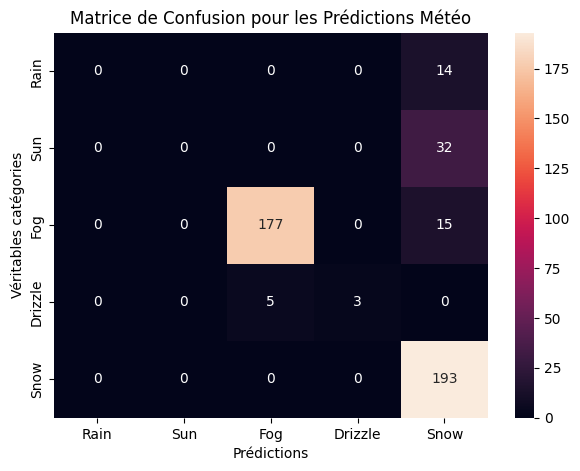

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5), dpi=100)
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=['Rain', 'Sun', 'Fog', 'Drizzle', 'Snow'],
            yticklabels=['Rain', 'Sun', 'Fog', 'Drizzle', 'Snow'])
plt.ylabel('Véritables catégories')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion pour les Prédictions Météo')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.00      0.00      0.00        32
           2       0.97      0.92      0.94       192
           3       0.75      0.38      0.50         8
           4       0.77      1.00      0.87       193

    accuracy                           0.85       439
   macro avg       0.60      0.47      0.49       439
weighted avg       0.79      0.85      0.81       439



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy') #cross_val_score entraîne automatiquement le modèle à chaque fold
print("Scores par fold :", scores)
print("Accuracy moyenne :", scores.mean())

Scores par fold : [0.85853659 0.8195122  0.83823529 0.87254902 0.87254902]
Accuracy moyenne : 0.8522764227642277


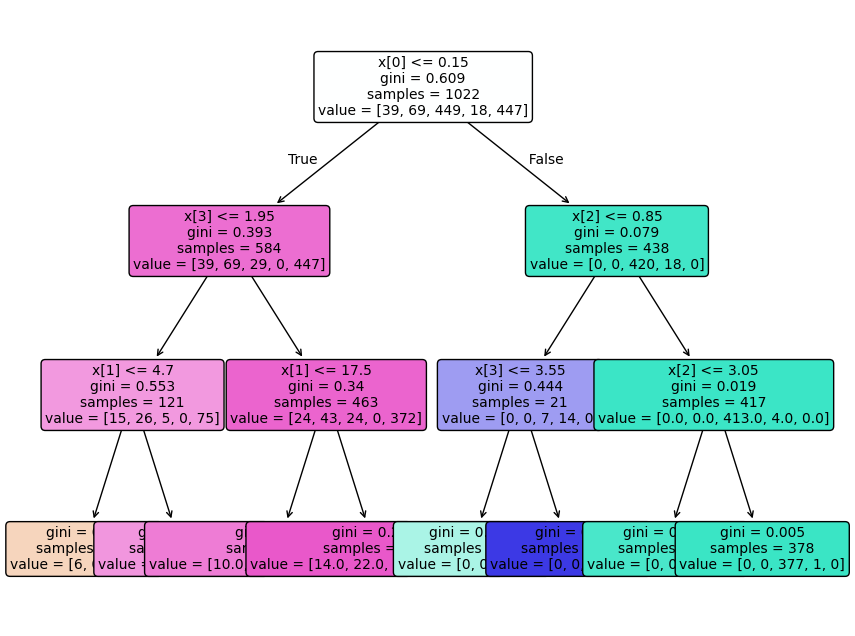

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Arbre de décision")
plot_tree(clf, filled=True, rounded=True, fontsize=10)
plt.show()